In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

In [4]:
df_projection = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv")

In [5]:
df_projection.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [6]:
df_reports = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv")

In [7]:
df_reports.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [8]:
from PIL import Image

In [9]:
path_folder = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized/"

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

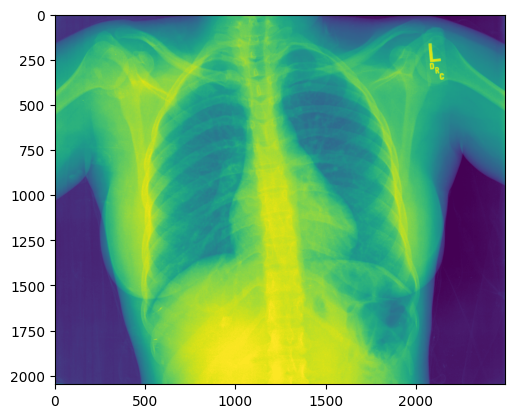

In [ ]:
image = Image.open(path_folder+"1_IM-0001-4001.dcm.png")
plt.imshow(image)

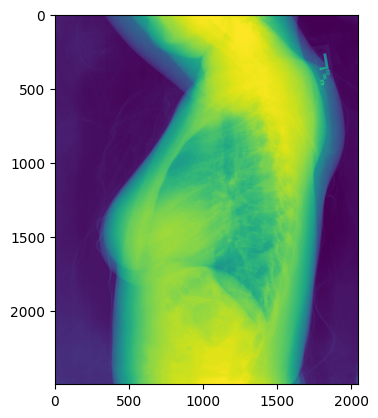

In [12]:
image = Image.open(path_folder+"1_IM-0001-3001.dcm.png")
plt.imshow(image)

In [13]:
df_reports = df_reports[["uid","findings","impression"]]

In [14]:
df_reports.head()

,uid,findings,impression
0,1,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [17]:
df_projection.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
2,2,2_IM-0652-1001.dcm.png,Frontal
4,3,3_IM-1384-1001.dcm.png,Frontal
6,4,4_IM-2050-1001.dcm.png,Frontal
8,5,5_IM-2117-1003002.dcm.png,Frontal


In [18]:
df_projection = df_projection[df_projection["projection"]=="Frontal"]

In [19]:
df_projection.describe()

,uid
count,3818.000000
mean,1998.817706
std,1162.008123
min,1.000000
25%,993.500000
50%,1989.000000
75%,3017.750000
max,3999.000000


In [20]:
len(df_projection)

3818

In [21]:
len(df_reports)

3851

In [22]:
df_reports.head()

,uid,findings,impression
0,1,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [23]:
merged_df = pd.merge(df_projection, df_reports, on='uid', suffixes=('_left', '_right'))

In [24]:
merged_df.head()

,uid,filename,projection,findings,impression
0,1,1_IM-0001-4001.dcm.png,Frontal,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,2_IM-0652-1001.dcm.png,Frontal,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,3_IM-1384-1001.dcm.png,Frontal,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,4_IM-2050-1001.dcm.png,Frontal,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,5_IM-2117-1003002.dcm.png,Frontal,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [25]:
len(merged_df)

3818

In [26]:
merged_df.drop("projection", axis=1, inplace=True)

In [27]:
merged_df.head()

,uid,filename,findings,impression
0,1,1_IM-0001-4001.dcm.png,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,2_IM-0652-1001.dcm.png,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,3_IM-1384-1001.dcm.png,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,4_IM-2050-1001.dcm.png,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,5_IM-2117-1003002.dcm.png,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [28]:
merged_df.drop("findings", axis=1, inplace=True)

In [29]:
merged_df.head()

,uid,filename,impression
0,1,1_IM-0001-4001.dcm.png,Normal chest x-XXXX.
1,2,2_IM-0652-1001.dcm.png,No acute pulmonary findings.
2,3,3_IM-1384-1001.dcm.png,"No displaced rib fractures, pneumothorax, or p..."
3,4,4_IM-2050-1001.dcm.png,1. Bullous emphysema and interstitial fibrosis...
4,5,5_IM-2117-1003002.dcm.png,No acute cardiopulmonary abnormality.


In [30]:
merged_df.drop("uid", axis=1, inplace=True)

In [31]:
merged_df.head()

,filename,impression
0,1_IM-0001-4001.dcm.png,Normal chest x-XXXX.
1,2_IM-0652-1001.dcm.png,No acute pulmonary findings.
2,3_IM-1384-1001.dcm.png,"No displaced rib fractures, pneumothorax, or p..."
3,4_IM-2050-1001.dcm.png,1. Bullous emphysema and interstitial fibrosis...
4,5_IM-2117-1003002.dcm.png,No acute cardiopulmonary abnormality.


In [32]:
merged_df["filename"] = merged_df["filename"].apply(lambda x:path_folder+x)

In [33]:
merged_df.head()

,filename,impression
0,/kaggle/input/chest-xrays-indiana-university/i...,Normal chest x-XXXX.
1,/kaggle/input/chest-xrays-indiana-university/i...,No acute pulmonary findings.
2,/kaggle/input/chest-xrays-indiana-university/i...,"No displaced rib fractures, pneumothorax, or p..."
3,/kaggle/input/chest-xrays-indiana-university/i...,1. Bullous emphysema and interstitial fibrosis...
4,/kaggle/input/chest-xrays-indiana-university/i...,No acute cardiopulmonary abnormality.


In [34]:
import re

def clean_medical_impression(text: str) -> str:
    """
    Cleans medical report impressions for embedding or NLP modeling:
    - Removes anonymized tokens (xxxx, x-xxx, etc.)
    - Removes punctuation and non-alphanumeric symbols
    - Normalizes case and whitespace
    - Keeps negations, sentence words, and medical terminology intact
    """
    if not isinstance(text, str):
        return ""
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove anonymization tokens: xxxx, x-xxx, xx-xx, etc.
    text = re.sub(r"\b[xX]{2,}\b", " ", text)
    text = re.sub(r"x[-x0-9]*x", " ", text)
    text = re.sub(r"[-_]*x+[-_x0-9]*", " ", text)
    
    # 3. Remove punctuation and non-alphanumeric symbols
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    
    # 4. Replace multiple spaces
    text = re.sub(r"\s+", " ", text).strip()
    
    return text



In [35]:
merged_df["impression"] = merged_df["impression"].apply(clean_medical_impression)

In [36]:
merged_df.head()

,filename,impression
0,/kaggle/input/chest-xrays-indiana-university/i...,normal chest
1,/kaggle/input/chest-xrays-indiana-university/i...,no acute pulmonary findings
2,/kaggle/input/chest-xrays-indiana-university/i...,no displaced rib fractures pneumothora or pleu...
3,/kaggle/input/chest-xrays-indiana-university/i...,1 bullous emphysema and interstitial fibrosis ...
4,/kaggle/input/chest-xrays-indiana-university/i...,no acute cardiopulmonary abnormality


In [37]:
all_impressions= merged_df["impression"].tolist()

In [38]:
len(all_impressions)

3818

In [39]:
def vocabulary(data):
    all_desc = set()
    for key in data:
        [all_desc.update(key.split())]
    return all_desc

vocabulary_data = vocabulary(all_impressions)
print(len(vocabulary_data))

1493


In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoImageProcessor

class MedicalImageTransformerEncoder(nn.Module):
    def __init__(self,
                 model_name="microsoft/rad-dino",
                 proj_dim=256,
                 adapter_dim=128,
                 freeze_backbone=True):
        super().__init__()

        # Load pretrained Swin Transformer backbone
        self.backbone = AutoModel.from_pretrained(model_name, trust_remote_code=True)
        self.processor = AutoImageProcessor.from_pretrained(model_name)

        # Optionally freeze the backbone
        if freeze_backbone:
            for param in self.backbone.parameters():
                param.requires_grad = False

        # Hidden dimension of Swin model
        hidden_dim = self.backbone.config.hidden_size

        # Lightweight LoRA-style adapter
        self.adapter = nn.Sequential(
            nn.Linear(hidden_dim, adapter_dim),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(adapter_dim, hidden_dim)
        )
        self.adapter_gate = nn.Parameter(torch.tensor(0.1))  # start small

        # Projection head for downstream fusion or retrieval
        self.projection = nn.Linear(hidden_dim, proj_dim)

        # Optional normalization
        self.norm = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(0.2)

    def forward(self, pixel_values):
        """
        Args:
            pixel_values (torch.Tensor): [B, 3, H, W]
        Returns:
            emb (torch.Tensor): [B, proj_dim] - projected embedding
            pooled (torch.Tensor): [B, hidden_dim] - pooled Swin features
        """
        # Extract features from Swin backbone
        outputs = self.backbone(pixel_values=pixel_values)

        # Swin outputs `last_hidden_state` of shape [B, num_patches, hidden_dim]
        hidden_states = outputs.last_hidden_state

        # Global average pooling across spatial patches
        pooled = hidden_states.mean(dim=1)  # [B, hidden_dim]

        # Normalize (optional, improves stability)
        pooled = self.norm(pooled)

        # Adapter fine-tuning (trainable)
        adapted = pooled + self.adapter_gate * self.adapter(pooled)

        # Project to lower-dimensional embedding
        adapted = self.dropout(adapted)
        emb = self.projection(adapted)

        return emb, pooled


In [ ]:
import torch
import torch.nn as nn

class BioViLTCompoundModel(nn.Module):
    def __init__(self, num_classes=14, freeze_encoder=True, dropout=0.3):
        super().__init__()

        # --- Shared image encoder ---
        self.encoder = MedicalImageTransformerEncoder(freeze_backbone=freeze_encoder)
        self.num_classes = num_classes

        # --- Metadata branch (age + gender) ---
        self.meta_fc = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Dropout(0.1)
        )

        # --- Shared fusion layer ---
        self.fusion = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # --- One-vs-All heads (1 per class) ---
        self.class_heads = nn.ModuleList([
            nn.Linear(128, 1) for _ in range(num_classes)
        ])

    def forward(self, image, age, gender):
        # 1. Image encoding
        img_emb, _ = self.encoder(image)  # [B, 128]

        # 2. Metadata
        #meta = torch.cat((age, gender), dim=1)
        #meta_feat = self.meta_fc(meta)  # [B, 16]

        # 3. Fuse features
        #fused = torch.cat((img_emb, meta_feat), dim=1)
        shared_feat = self.fusion(img_emb)  # [B, 128]

        # 4. One-vs-All logits
        logits = torch.cat([head(shared_feat) for head in self.class_heads], dim=1)  # [B, num_classes]

        return logits, img_emb


In [ ]:
import torch
import os

def load_model_checkpoint(model, checkpoint_path, device="cpu", optimizer=None, strict=True):
    """
    Loads model weights (and optionally optimizer) from a checkpoint file.

    Args:
        model (torch.nn.Module): The model instance to load weights into.
        checkpoint_path (str): Path to .pth or .pt file.
        device (str): "cpu" or "cuda".
        optimizer (torch.optim.Optimizer, optional): Optimizer to restore state.
        strict (bool): Whether to strictly enforce that keys match.

    Returns:
        model, optimizer, start_epoch, val_loss
    """
    if not os.path.exists(checkpoint_path):
        raise FileNotFoundError(f"❌ Checkpoint not found: {checkpoint_path}")

    checkpoint = torch.load(checkpoint_path, map_location=device)
    start_epoch, val_loss = 0, None

    # Case 1 — checkpoint contains only model_state_dict
    if isinstance(checkpoint, dict) and "model_state_dict" in checkpoint:
        model.load_state_dict(checkpoint["model_state_dict"], strict=strict)
        if optimizer and "optimizer_state_dict" in checkpoint:
            optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
        start_epoch = checkpoint.get("epoch", 0)
        val_loss = checkpoint.get("val_loss", None)
        print(f"✅ Loaded model_state_dict from checkpoint (epoch={start_epoch})")

    # Case 2 — checkpoint is a raw state_dict
    elif isinstance(checkpoint, dict):
        model.load_state_dict(checkpoint, strict=strict)
        print("✅ Loaded raw state_dict directly")

    # Case 3 — full model object was saved
    else:
        model = checkpoint
        print("✅ Loaded entire model object (torch.save(model, ...))")

    model.to(device)
    model.eval()

    return model, optimizer, start_epoch, val_loss

In [ ]:
model = BioViLTCompoundModel(freeze_encoder=False)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = BioViLTCompoundModel(num_classes=14)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

model, optimizer, start_epoch, best_val_loss = load_model_checkpoint(
    model, "/kaggle/input/nih-train-model/pytorch/default/2/best_model (5).pth", device=device, optimizer=optimizer
)

In [40]:
merged_df.head()

,filename,impression
0,/kaggle/input/chest-xrays-indiana-university/i...,normal chest
1,/kaggle/input/chest-xrays-indiana-university/i...,no acute pulmonary findings
2,/kaggle/input/chest-xrays-indiana-university/i...,no displaced rib fractures pneumothora or pleu...
3,/kaggle/input/chest-xrays-indiana-university/i...,1 bullous emphysema and interstitial fibrosis ...
4,/kaggle/input/chest-xrays-indiana-university/i...,no acute cardiopulmonary abnormality


In [41]:
merged_df.to_csv("cleaned_reports.csv", index=False)

In [42]:
merged_df["age"] = 2
merged_df["gender"] = "M"

In [43]:
merged_df.head()

,filename,impression,age,gender
0,/kaggle/input/chest-xrays-indiana-university/i...,normal chest,2,M
1,/kaggle/input/chest-xrays-indiana-university/i...,no acute pulmonary findings,2,M
2,/kaggle/input/chest-xrays-indiana-university/i...,no displaced rib fractures pneumothora or pleu...,2,M
3,/kaggle/input/chest-xrays-indiana-university/i...,1 bullous emphysema and interstitial fibrosis ...,2,M
4,/kaggle/input/chest-xrays-indiana-university/i...,no acute cardiopulmonary abnormality,2,M


In [ ]:
import os
import time
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
import albumentations as A
from transformers import AutoImageProcessor

# ============================================================
# ✅ Class-aware augmentation for imbalance
# ============================================================
class ChestDataset(Dataset):
    def __init__(self, df, model_name="microsoft/rad-dino", img_size=224, train=True):
        self.df = df.reset_index(drop=True)
        self.train = train
        self.processor = AutoImageProcessor.from_pretrained(model_name)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # --- Load image ---
        img = np.array(Image.open(row["filename"]).convert("L"))
        img = np.stack([img, img, img], axis=-1)


        # --- Apply HF processor (normalization + tensor conversion) ---
        proc = self.processor(images=img, return_tensors="pt",do_center_crop=False,
    do_resize=True,
    size={"height": 518, "width": 518})
        img_tensor = proc["pixel_values"].squeeze(0)

        # --- Metadata ---
        age = torch.tensor([float(row["age"])], dtype=torch.float32)
        gender = 1.0 if str(row["gender"]).upper().startswith("M") else 0.0
        gender = torch.tensor([gender], dtype=torch.float32)
        file = row["filename"].split("/")[-1]

        return img_tensor, age, gender, file

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pandas as pd
from PIL import Image
import timm
import numpy as np

In [ ]:
from tqdm import tqdm

def get_val_dataloader(dataset, batch_size=16, shuffle=False):
    optimal_workers = min(8, os.cpu_count() // 2)
    return DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=optimal_workers,
        pin_memory=True,
        prefetch_factor=4,
        persistent_workers=True
    )

#val_dataset = ChestDataset(df_test_final, train=False)
#val_loader = get_val_dataloader(val_dataset, shuffle=False)

In [ ]:
def Create_image_embeddings(df, model, device):
    val_dataset = ChestDataset(df, train=False)
    val_loader = get_val_dataloader(val_dataset, batch_size = 1, shuffle=False)

    val_bar = tqdm(val_loader, desc="Validating", leave=False) 
    filename_dict = {}

    model.eval()
    
    with torch.no_grad():
        for img, age, gender, file in val_bar:
            img = img.to(device, non_blocking=True)
            age = age.to(device, non_blocking=True)
            gender = gender.to(device, non_blocking=True)
    
            _, embeddings = model(img, age, gender)
            filename_dict[file[0]] = embeddings[0]

    return filename_dict

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

extract_image_embeddings = Create_image_embeddings(merged_df, model, device)

In [ ]:
len(extract_image_embeddings)

In [ ]:
list(extract_image_embeddings.keys())[0]

In [ ]:
extract_image_embeddings["1_IM-0001-4001.dcm.png"].shape

In [ ]:
import pickle

with open("encodings.pkl", "wb") as f:
    pickle.dump(extract_image_embeddings, f)

In [ ]:
### Handling texts

In [44]:
merged_df.head()

,filename,impression,age,gender
0,/kaggle/input/chest-xrays-indiana-university/i...,normal chest,2,M
1,/kaggle/input/chest-xrays-indiana-university/i...,no acute pulmonary findings,2,M
2,/kaggle/input/chest-xrays-indiana-university/i...,no displaced rib fractures pneumothora or pleu...,2,M
3,/kaggle/input/chest-xrays-indiana-university/i...,1 bullous emphysema and interstitial fibrosis ...,2,M
4,/kaggle/input/chest-xrays-indiana-university/i...,no acute cardiopulmonary abnormality,2,M


In [45]:
all_captions = merged_df["impression"].tolist()

In [46]:
len(all_captions)

3818

In [47]:
# Consider only words which occur at least 3 times in the corpus

word_count_threshold = 3
word_counts = {}
nsents = 0

for sent in all_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d -> %d' % (len(word_counts), len(vocab)))


preprocessed words 1494 -> 805


In [48]:
import pickle

In [49]:
ixtoword = {}
wordtoix = {}

ix = 1
for w in vocab:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1
    
vocab_size = len(ixtoword) + 1 # one for appended 0's
vocab_size

# Save the words to index and index to word as pickle files

with open("words.pkl", "wb") as encoded_pickle:
    pickle.dump(wordtoix, encoded_pickle)
    
with open("words1.pkl", "wb") as encoded_pickle:
    pickle.dump(ixtoword, encoded_pickle)

In [50]:
vocab_size

806

In [51]:
len(all_captions)

3818

In [52]:
lengths = [len(cap.split(" ")) for cap in all_captions]

In [53]:
max(lengths)

126

In [54]:


import torch
print('CUDA Version:', torch.version.cuda)

CUDA Version: 12.4


In [ ]:
pip install torch transformers faiss-gpu-cu12 datasets accelerate sentencepiece evaluate rouge-score sacrebleu

In [ ]:
pip install faiss-cpu

In [1]:
from typing import List, Dict, Tuple
import torch
import torch.nn as nn1
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, AutoModel, AutoModelForSeq2SeqLM,
    BartTokenizer, BartForConditionalGeneration
)
import faiss
import numpy as np
import pickle
import os

2026-01-18 06:13:02.975178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768716783.160649     162 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768716783.214733     162 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [58]:
# ---------------------------
# Helpers: load image embeddings
# ---------------------------
def load_image_embeddings(pkl_path: str) -> Dict[str, np.ndarray]:
    with open(pkl_path, "rb") as f:
        data = pickle.load(f)
    # Expect data to be dict {filename: embedding}
    return data


In [59]:
img_embedding_map = load_image_embeddings("/kaggle/input/models-encodings/other/indiana-encodings/2/encodings.pkl")

In [ ]:
!pip uninstall -y pyarrow pandas numpy
!pip install -U "numpy==1.26.4" "pandas==2.2.2" "pyarrow==16.1.0"

In [2]:
import evaluate
from typing import List, Dict

rouge_metric = evaluate.load("rouge")
bleu_metric  = evaluate.load("sacrebleu")

def compute_bleu_1_2(preds: List[str], refs: List[str]) -> Dict[str, float]:
    """
    sacrebleu gives BLEU-4 by default, but returns n-gram precisions,
    so BLEU-1 and BLEU-2 can be approximated from precision scores.
    """
    result = bleu_metric.compute(predictions=preds, references=[[r] for r in refs])

    # ngram precisions are given in %
    precisions = result["precisions"]  # [p1, p2, p3, p4]
    bleu1 = precisions[0] / 100.0
    bleu2 = precisions[1] / 100.0

    return {
        "BLEU": result["score"] / 100.0,
        "BLEU-1": bleu1,
        "BLEU-2": bleu2
    }

def compute_rouge(preds: List[str], refs: List[str]) -> Dict[str, float]:
    rouge = rouge_metric.compute(
        predictions=preds,
        references=refs,
        use_stemmer=True
    )
    # returns rouge1, rouge2, rougeL, rougeLsum
    return {
        "ROUGE-1": rouge["rouge1"],
        "ROUGE-2": rouge["rouge2"],
        "ROUGE-L": rouge["rougeL"]
    }


In [60]:
import numpy as np
v = list(img_embedding_map.values())
print(np.mean(v[0].cpu().numpy()), np.std(v[0].cpu().numpy()))

-0.03126303 1.1964077


In [61]:
print(np.mean(v[1].cpu().numpy()), np.std(v[1].cpu().numpy()))

-0.049558777 0.9005599


In [62]:
print(np.mean(v[100].cpu().numpy()), np.std(v[100].cpu().numpy()))

-0.0040813386 1.0020447


In [63]:
import torch
import numpy as np

# Stack all embeddings into a single tensor
image_embs = torch.stack(list(img_embedding_map.values()))  # works directly for tensors
print("image_embs shape:", image_embs.shape)
print("mean:", image_embs.mean().item(), "std:", image_embs.std().item())
print("unique vectors:", len(torch.unique(image_embs.cpu(), dim=0)))

image_embs shape: torch.Size([3818, 256])
mean: -0.03116295300424099 std: 1.0511597394943237
unique vectors: 3816


In [64]:
# ---------------------------
# Build text embeddings for retrieval (ClinicalBERT pooler)
# ---------------------------
def compute_text_embeddings(
    texts: List[str],
    tokenizer: AutoTokenizer,
    model: AutoModel,
    device: torch.device,
    batch_size: int = 16,
    max_length: int = 100
) -> np.ndarray:
    model.to(device)
    model.eval()
    emb_list = []
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i : i + batch_size]
            inputs = tokenizer(
                batch,
                padding=True,
                truncation=True,
                max_length=max_length,
                return_tensors="pt"
            ).to(device)
            outputs = model(**inputs, return_dict=True)
            # Use CLS pooling: last_hidden_state[:,0,:] or model.pooler_output if available
            if hasattr(outputs, "pooler_output") and outputs.pooler_output is not None:
                emb = outputs.pooler_output.cpu().numpy()
            else:
                emb = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            # normalize
            emb = emb / np.linalg.norm(emb, axis=1, keepdims=True)
            emb_list.append(emb)
    return np.vstack(emb_list)  # shape [N, dim]


In [65]:
import numpy as np

In [66]:
# ---------------------------
# FAISS index util
# ---------------------------
def build_faiss_index(embeddings: np.ndarray, use_gpu: bool = False) -> faiss.IndexFlatIP:
    dim = embeddings.shape[1]
    index = faiss.IndexFlatIP(dim)  # inner product (cosine if normalized)
    if use_gpu:
        # GPU version: faiss.index_cpu_to_gpu
        res = faiss.StandardGpuResources()
        index = faiss.index_cpu_to_gpu(res, 0, index)
    index.add(embeddings.astype(np.float32))
    return index

def faiss_search(index, query_embs: np.ndarray, topk: int = 5) -> Tuple[np.ndarray, np.ndarray]:
    # query_embs should be normalized
    D, I = index.search(query_embs.astype(np.float32), topk)
    return D, I  # distances and indices


In [67]:
# ---------------------------
# Dataset for training
# ---------------------------
class MultimodalReportDataset(Dataset):
    def __init__(
        self,
        df,  # pandas DataFrame with columns ['filename', 'clean_impression']
        image_emb_map: Dict[str, np.ndarray],
        tokenizer,  # tokenizer for generator
        text_tokenizer,  # tokenizer for text retrieval (ClinicalBERT tokenizer)
        max_gen_len: int = 100
    ):
        self.df = df.reset_index(drop=True)
        self.image_emb_map = image_emb_map
        self.tokenizer = tokenizer
        self.text_tokenizer = text_tokenizer
        self.max_gen_len = max_gen_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.loc[idx]
        filename = row["filename"]
        text = str(row["impression"])
        image_emb = self.image_emb_map.get(filename.split("/")[-1])
        if image_emb is None:
            print(f"{filename}, falling back")
            # fallback zero vector
            image_emb = np.zeros(128, dtype=np.float32)
        return {
            "idx": idx,
            "filename": filename,
            "impression": text,
            "image_emb": image_emb
        }


In [68]:

# Collate function creates generator inputs later after retrieval
def collate_fn(batch):
    # just return as-is; retrieval and tokenization handled later in training loop
    return batch


In [69]:
import torch
import torch.nn.functional as F
from tqdm import tqdm

@torch.no_grad()
def validate_generation(
    model,
    val_loader,
    retriever_index,
    corpus_texts,
    device,
    topk: int = 3,
    max_prompt_len: int = 128,
    max_gen_len: int = 128,
    num_beams: int = 3
):
    model.eval()

    all_preds, all_refs = [], []

    for batch in tqdm(val_loader, desc="Validating", leave=False):
        filenames = [b["filename"] for b in batch]
        refs = [b["impression"] for b in batch]

        # Encode query text with ClinicalBERT
        text_inputs = model.text_tokenizer(
            refs, padding=True, truncation=True,
            return_tensors="pt", max_length=max_prompt_len
        ).to(device)

        txt_pool = model.forward_text_embedding(
            text_inputs["input_ids"], text_inputs["attention_mask"]
        )
        txt_pool = F.normalize(txt_pool.float(), dim=1)

        # Retrieval (FAISS)
        txt_pool_faiss = txt_pool.detach().cpu().numpy()
        D, I = faiss_search(retriever_index, txt_pool_faiss, topk=topk)

        retrieved_prompts = []
        for i in range(len(refs)):
            ids = I[i].tolist()
            context = " ".join([corpus_texts[j] for j in ids])
            retrieved_prompts.append(f"image: {filenames[i]} context: {context} report:")

        gen_inputs = model.gen_tokenizer(
            retrieved_prompts, padding=True, truncation=True,
            max_length=max_prompt_len, return_tensors="pt"
        ).to(device)

        # Generate
        gen_ids = model.generator.generate(
            input_ids=gen_inputs.input_ids,
            attention_mask=gen_inputs.attention_mask,
            max_length=max_gen_len,
            num_beams=num_beams,
            early_stopping=True
        )
        preds = model.gen_tokenizer.batch_decode(gen_ids, skip_special_tokens=True)

        all_preds.extend([p.strip() for p in preds])
        all_refs.extend([r.strip() for r in refs])

    rouge = compute_rouge(all_preds, all_refs)
    bleu  = compute_bleu_1_2(all_preds, all_refs)

    return {**rouge, **bleu}


In [71]:
import torch
import torch.nn as nn
from tqdm import tqdm

# ---------------------------
# Model wrapper: RAG-like generator + contrastive head
# ---------------------------
class MultimodalRagModel(nn.Module):
    def __init__(
        self,
        text_encoder_name: str = "emilyalsentzer/Bio_ClinicalBERT",
        generator_name: str = "facebook/bart-base",
        device: torch.device = torch.device("cpu"),
        projection_dim: int = 256
    ):
        super().__init__()
        self.device = device

        # ClinicalBERT for text embeddings (contrastive + retrieval)
        self.text_tokenizer = AutoTokenizer.from_pretrained(text_encoder_name)
        self.text_encoder = AutoModel.from_pretrained(text_encoder_name)

        # Seq2Seq generator (BART)
        self.gen_tokenizer = BartTokenizer.from_pretrained(generator_name)
        self.generator = BartForConditionalGeneration.from_pretrained(generator_name)

        # Projection heads for contrastive alignment (image_emb -> proj ; text_emb -> proj)
        text_dim = self.text_encoder.config.hidden_size
        # assume image embeddings dimension matches or adjust
        self.img_proj = nn.Linear(256, projection_dim)    # change 512 to actual dim of image embeddings if different
        self.txt_proj = nn.Linear(text_dim, projection_dim)

        # temperature scalar for contrastive loss
        self.logit_scale = nn.Parameter(torch.tensor(1.0))  # learnable

    def forward_text_embedding(self, input_ids, attention_mask):
        out = self.text_encoder(input_ids=input_ids, attention_mask=attention_mask, return_dict=True)
        if hasattr(out, "pooler_output") and out.pooler_output is not None:
            pooled = out.pooler_output
        else:
            pooled = out.last_hidden_state[:, 0, :]
        return pooled  # [B, hidden_dim]

    def project_text(self, txt_emb):
        return self.txt_proj(txt_emb)

    def project_image(self, img_emb):
        return self.img_proj(img_emb)

    def generate(self, input_ids, attention_mask, **gen_kwargs):
        return self.generator(input_ids=input_ids, attention_mask=attention_mask, **gen_kwargs)

# ---------------------------
# Contrastive loss (infoNCE)
# ---------------------------
def contrastive_loss_fn(image_proj, text_proj, logit_scale):
    """
    image_proj: [B, D]
    text_proj: [B, D]
    logit_scale: torch.exp(model.logit_scale) typically > 1
    """
    image_proj = nn.functional.normalize(image_proj, dim=1)
    text_proj = nn.functional.normalize(text_proj, dim=1)

    logits = logit_scale * torch.matmul(image_proj, text_proj.t())  # [B, B]
    labels = torch.arange(logits.size(0), device=logits.device)
    
    loss_i = nn.CrossEntropyLoss()(logits, labels)      # image->text
    loss_t = nn.CrossEntropyLoss()(logits.t(), labels)  # text->image
    return 0.5 * (loss_i + loss_t)

# ---------------------------
# Training loop skeleton
# ---------------------------

def freeze_clinicalbert_layers(model, unfreeze_last_n: int = 3):
    """
    Freeze all ClinicalBERT layers except the last `unfreeze_last_n` transformer blocks.
    """
    assert hasattr(model.text_encoder, 'encoder'), "Expected transformer encoder (e.g. ClinicalBERT)"

    # Freeze everything
    for param in model.text_encoder.parameters():
        param.requires_grad = False

    # Unfreeze last n transformer blocks
    for layer in model.text_encoder.encoder.layer[-unfreeze_last_n:]:
        for param in layer.parameters():
            param.requires_grad = True

    # Always unfreeze pooler
    if hasattr(model.text_encoder, "pooler"):
        for param in model.text_encoder.pooler.parameters():
            param.requires_grad = True

    print(f"✅ ClinicalBERT frozen except last {unfreeze_last_n} layers + pooler.")
    
def train(
    df,
    image_emb_map,
    model,
    retriever_index,
    corpus_texts: List[str],
    corpus_ids: List[int],
    val_df=None,

    device: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    epochs: int = 10,
    batch_size: int = 8,
    topk: int = 3,

    # joint loss weights
    alpha_start: float = 0.5,
    alpha_end: float = 0.1,

    # generation params for validation
    validate_every: int = 1,
    num_beams: int = 3,
    max_gen_len: int = 128,

    # stability
    gen_lr: float = 1e-5,
    con_lr: float = 1e-5,
    logit_lr: float = 1e-6,
    weight_decay: float = 0.01,
    grad_clip: float = 1.0,
    clamp_logit_scale: float = 4.6052,  # ln(100)

    # optional: progressive unfreeze (helps if you want more adaptation)
    progressive_unfreeze: bool = False,
    initial_unfreeze_n: int = 1,
    max_unfreeze_n: int = 4
):
    model.to(device)

    # Init projection layers
    nn.init.xavier_uniform_(model.img_proj.weight)
    nn.init.xavier_uniform_(model.txt_proj.weight)
    nn.init.zeros_(model.img_proj.bias)
    nn.init.zeros_(model.txt_proj.bias)

    # Init temperature like CLIP
    with torch.no_grad():
        model.logit_scale.copy_(torch.tensor(np.log(1 / 0.07), device=device))

    # ---- loaders
    dataset = MultimodalReportDataset(df, image_emb_map, model.gen_tokenizer, model.text_tokenizer)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    val_loader = None
    if val_df is not None:
        val_dataset = MultimodalReportDataset(val_df, image_emb_map, model.gen_tokenizer, model.text_tokenizer)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    # ---- helper: which ClinicalBERT layers train
    def set_clinical_unfreeze(n: int):
        for p in model.text_encoder.parameters():
            p.requires_grad = False

        if hasattr(model.text_encoder, "encoder"):
            n_clamped = max(0, min(n, len(model.text_encoder.encoder.layer)))
            for layer in model.text_encoder.encoder.layer[-n_clamped:]:
                for p in layer.parameters():
                    p.requires_grad = True

        if hasattr(model.text_encoder, "pooler"):
            for p in model.text_encoder.pooler.parameters():
                p.requires_grad = True

    # Default: DO NOT over-train ClinicalBERT → avoid retrieval drift
    if progressive_unfreeze:
        set_clinical_unfreeze(initial_unfreeze_n)
    else:
        # freeze all text encoder except pooler (stable)
        set_clinical_unfreeze(0)

    # ---- optimizer (single optimizer = stable)
    optimizer = torch.optim.AdamW(
        [
            {"params": [p for p in model.text_encoder.parameters() if p.requires_grad], "lr": con_lr},
            {"params": model.img_proj.parameters(), "lr": con_lr},
            {"params": model.txt_proj.parameters(), "lr": con_lr},
            {"params": model.generator.parameters(), "lr": gen_lr},
            {"params": [model.logit_scale], "lr": logit_lr},
        ],
        weight_decay=weight_decay
    )

    # alpha schedule (decay contrastive importance)
    def get_alpha(epoch_idx: int):
        if epochs <= 1:
            return alpha_end
        t = epoch_idx / (epochs - 1)
        return alpha_start * (1 - t) + alpha_end * t

    best_rougeL = -1.0

    # =====================================================
    # Single Stage Joint Training
    # =====================================================
    print("\n=== Single-stage Joint Training ===")
    for epoch in range(epochs):
        model.train()

        # progressive unfreeze every 2 epochs (optional)
        if progressive_unfreeze and epoch > 0 and (epoch % 2 == 0):
            n = min(initial_unfreeze_n + epoch // 2, max_unfreeze_n)
            set_clinical_unfreeze(n)
            print(f"🔓 Progressive unfreeze → last {n} ClinicalBERT layers trainable")

        alpha = get_alpha(epoch)
        running_total, running_gen, running_con = [], [], []

        for batch in tqdm(loader, desc=f"Epoch {epoch+1}/{epochs} | α={alpha:.3f}"):
            filenames = [b["filename"] for b in batch]
            texts = [b["impression"] for b in batch]

            # -------- image embeddings
            image_embs = torch.stack([
                (torch.from_numpy(b["image_emb"]) if isinstance(b["image_emb"], np.ndarray) else b["image_emb"])
                .float().to(device) for b in batch
            ])
            image_embs = F.normalize(image_embs, dim=1)

            # -------- ClinicalBERT embeddings
            text_inputs = model.text_tokenizer(
                texts, padding=True, truncation=True,
                return_tensors="pt", max_length=128
            ).to(device)

            txt_pool = model.forward_text_embedding(text_inputs["input_ids"], text_inputs["attention_mask"])
            txt_pool = F.normalize(txt_pool.float(), dim=1)

            # -------- contrastive
            img_proj = model.project_image(image_embs)
            txt_proj = model.project_text(txt_pool)

            logit_scale = torch.exp(model.logit_scale)
            c_loss = contrastive_loss_fn(img_proj, txt_proj, logit_scale=logit_scale)

            # -------- retrieval
            txt_pool_faiss = txt_pool.detach().cpu().numpy()
            D, I = faiss_search(retriever_index, txt_pool_faiss, topk=topk)

            retrieved_prompts = []
            for i in range(len(texts)):
                ids = I[i].tolist()
                context = " ".join([corpus_texts[j] for j in ids])
                retrieved_prompts.append(f"image: {filenames[i]} context: {context} report:")

            gen_inputs = model.gen_tokenizer(
                retrieved_prompts, padding=True, truncation=True,
                max_length=128, return_tensors="pt"
            ).to(device)

            labels = model.gen_tokenizer(
                texts, padding=True, truncation=True,
                max_length=128, return_tensors="pt"
            ).input_ids.to(device)

            outputs = model.generator(
                input_ids=gen_inputs.input_ids,
                attention_mask=gen_inputs.attention_mask,
                labels=labels
            )
            gen_loss = outputs.loss

            # -------- total loss
            total_loss = gen_loss + alpha * c_loss

            optimizer.zero_grad()
            total_loss.backward()

            # ✅ gradient clipping (prevents divergence)
            torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

            optimizer.step()

            # ✅ clamp temperature
            with torch.no_grad():
                model.logit_scale.clamp_(min=-clamp_logit_scale, max=clamp_logit_scale)

            running_total.append(total_loss.item())
            running_gen.append(gen_loss.item())
            running_con.append(c_loss.item())

        print(
            f"Epoch {epoch+1}/{epochs} | "
            f"α={alpha:.3f} | "
            f"total={np.mean(running_total):.4f} | "
            f"gen={np.mean(running_gen):.4f} | "
            f"con={np.mean(running_con):.4f} | "
            f"logit_scale={torch.exp(model.logit_scale).item():.3f}"
        )

        # ======================
        # Validation (ROUGE/BLEU)
        # ======================
        if val_loader is not None and ((epoch + 1) % validate_every == 0):
            metrics = validate_generation(
                model=model,
                val_loader=val_loader,
                retriever_index=retriever_index,
                corpus_texts=corpus_texts,
                device=device,
                topk=topk,
                max_gen_len=max_gen_len,
                num_beams=num_beams
            )

            print(
                f"VAL | ROUGE-1={metrics['ROUGE-1']:.4f} "
                f"ROUGE-2={metrics['ROUGE-2']:.4f} "
                f"ROUGE-L={metrics['ROUGE-L']:.4f} "
                f"BLEU-1={metrics['BLEU-1']:.4f} "
                f"BLEU-2={metrics['BLEU-2']:.4f}"
            )

            # save best by ROUGE-L
            if metrics["ROUGE-L"] > best_rougeL:
                best_rougeL = metrics["ROUGE-L"]
                torch.save(model.state_dict(), "best_multimodal_rag_model.pt")
                print(f"✅ Saved BEST checkpoint (ROUGE-L={best_rougeL:.4f})")

    # Save final
    torch.save(model.state_dict(), "multimodal_rag_model.pt")
    print("\n🏁 Training complete. Model saved as 'multimodal_rag_model.pt'.")

In [72]:
model_train = MultimodalRagModel()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

# load df and embeddings
df = pd.read_csv("/kaggle/working/cleaned_reports.csv")  # must include filename and clean_impression
df = df.dropna()
df_train, df_test = train_test_split(df,test_size=0.15, random_state=42)


image_emb_map = load_image_embeddings("/kaggle/input/models-encodings/other/indiana-encodings/2/encodings.pkl")  # {filename: np.array([...])}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# instantiate model
model = MultimodalRagModel(device=device)
# prepare corpus texts (all cleaned impressions) in same order as df
corpus_texts = df_train["impression"].tolist()

# Compute text embeddings for entire corpus (ClinicalBERT)
text_embeddings = compute_text_embeddings(
    texts=corpus_texts,
    tokenizer=model.text_tokenizer,
    model=model.text_encoder,
    device=device,
    batch_size=32
)  # [N, H]

# Build FAISS index (normalize already done)
index = build_faiss_index(text_embeddings, use_gpu=False)

corpus_ids = list(range(len(corpus_texts)))  # map index -> df idx

# Train


In [74]:
dataset = MultimodalReportDataset(df, image_emb_map, model.gen_tokenizer, model.text_tokenizer)
loader = DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

batch = next(iter(loader))

In [75]:
batch

[{'idx': 111,
  'filename': '/kaggle/input/chest-xrays-indiana-university/images/images_normalized/113_IM-0086-3001.dcm.png',
  'impression': '1 no acute cardiopulmonary disease',
  'image_emb': tensor([ 2.9944e-01, -4.9787e-01, -6.6958e-01, -1.2470e-01,  1.6028e+00,
          -1.2738e-01,  1.3817e-01, -5.4149e-01,  1.7624e-01,  2.2435e+00,
          -1.0694e+00, -1.3590e-01,  7.0488e-02, -5.4769e-01, -9.4029e-01,
          -5.3316e-01, -8.4182e-01, -3.2741e-01,  1.6606e-01,  1.5471e+00,
          -2.4877e-01, -4.6359e-01,  4.3943e-01,  1.1877e-01,  8.3136e-01,
          -1.1981e-01, -1.6507e+00, -3.1602e-01,  2.2756e+00,  5.9871e-01,
          -1.8391e+00,  4.7367e-02,  6.4599e-01, -1.5066e-01, -7.8767e-01,
           1.6394e+00,  1.9031e+00, -1.7618e+00, -9.2008e-01, -6.2033e-01,
          -5.4111e-02, -1.4996e-01,  2.3768e-01, -8.4950e-02,  1.2590e+00,
           5.7470e-01,  1.1678e+00,  1.1187e-01, -5.8674e-01, -4.0901e-01,
           1.0638e-01,  1.3743e+00,  2.9529e-01, -6.9809e

In [76]:
from sklearn.model_selection import train_test_split

SEED = 42
VAL_RATIO = 0.15

# change this to your label column name if it exists
STRATIFY_COL = "disease"   # e.g. "disease", "label", "labels"

train_df, val_df = train_test_split(
    df,
    test_size=VAL_RATIO,
    random_state=SEED,
    stratify=df[STRATIFY_COL] if STRATIFY_COL in df.columns else None
)

train_df = train_df.reset_index(drop=True)
val_df   = val_df.reset_index(drop=True)

print("Train:", len(train_df), " Val:", len(val_df))

Train: 3219  Val: 569


In [78]:
train(
    df=train_df,
    val_df=val_df,
    image_emb_map=image_emb_map,
    model=model,
    retriever_index=index,
    corpus_texts=corpus_texts,
    corpus_ids=corpus_ids,
    epochs=12
)


=== Single-stage Joint Training ===


Epoch 1/12 | α=0.500: 100%|██████████| 403/403 [01:23<00:00,  4.84it/s]


Epoch 1/12 | α=0.500 | total=4.1347 | gen=3.1416 | con=1.9861 | logit_scale=14.285


VAL | ROUGE-1=0.4149 ROUGE-2=0.3123 ROUGE-L=0.4135 BLEU-1=0.4820 BLEU-2=0.3435
✅ Saved BEST checkpoint (ROUGE-L=0.4135)


Epoch 2/12 | α=0.464: 100%|██████████| 403/403 [01:22<00:00,  4.88it/s]


Epoch 2/12 | α=0.464 | total=1.7524 | gen=0.9250 | con=1.7846 | logit_scale=14.289


VAL | ROUGE-1=0.4076 ROUGE-2=0.2813 ROUGE-L=0.4070 BLEU-1=0.4199 BLEU-2=0.2590


Epoch 3/12 | α=0.427: 100%|██████████| 403/403 [01:22<00:00,  4.89it/s]


Epoch 3/12 | α=0.427 | total=1.5233 | gen=0.8225 | con=1.6402 | logit_scale=14.292


VAL | ROUGE-1=0.4580 ROUGE-2=0.3583 ROUGE-L=0.4577 BLEU-1=0.4868 BLEU-2=0.3452
✅ Saved BEST checkpoint (ROUGE-L=0.4577)


Epoch 4/12 | α=0.391: 100%|██████████| 403/403 [01:22<00:00,  4.86it/s]


Epoch 4/12 | α=0.391 | total=1.3785 | gen=0.7773 | con=1.5381 | logit_scale=14.295


VAL | ROUGE-1=0.4457 ROUGE-2=0.3150 ROUGE-L=0.4430 BLEU-1=0.4981 BLEU-2=0.3226


Epoch 5/12 | α=0.355: 100%|██████████| 403/403 [01:22<00:00,  4.87it/s]


Epoch 5/12 | α=0.355 | total=1.2324 | gen=0.7218 | con=1.4401 | logit_scale=14.298


VAL | ROUGE-1=0.4774 ROUGE-2=0.3694 ROUGE-L=0.4738 BLEU-1=0.5208 BLEU-2=0.3585
✅ Saved BEST checkpoint (ROUGE-L=0.4738)


Epoch 6/12 | α=0.318: 100%|██████████| 403/403 [01:22<00:00,  4.87it/s]


Epoch 6/12 | α=0.318 | total=1.1381 | gen=0.6995 | con=1.3785 | logit_scale=14.301


VAL | ROUGE-1=0.4622 ROUGE-2=0.3504 ROUGE-L=0.4573 BLEU-1=0.4612 BLEU-2=0.2921


Epoch 7/12 | α=0.282: 100%|██████████| 403/403 [01:23<00:00,  4.85it/s]


Epoch 7/12 | α=0.282 | total=1.0286 | gen=0.6605 | con=1.3063 | logit_scale=14.304


VAL | ROUGE-1=0.4697 ROUGE-2=0.3596 ROUGE-L=0.4660 BLEU-1=0.4925 BLEU-2=0.3222


Epoch 8/12 | α=0.245: 100%|██████████| 403/403 [01:23<00:00,  4.83it/s]


Epoch 8/12 | α=0.245 | total=0.9505 | gen=0.6435 | con=1.2509 | logit_scale=14.307


VAL | ROUGE-1=0.4745 ROUGE-2=0.3611 ROUGE-L=0.4693 BLEU-1=0.4884 BLEU-2=0.3098


Epoch 9/12 | α=0.209: 100%|██████████| 403/403 [01:23<00:00,  4.85it/s]


Epoch 9/12 | α=0.209 | total=0.8655 | gen=0.6158 | con=1.1938 | logit_scale=14.310


VAL | ROUGE-1=0.4738 ROUGE-2=0.3700 ROUGE-L=0.4679 BLEU-1=0.4373 BLEU-2=0.2616


Epoch 10/12 | α=0.173: 100%|██████████| 403/403 [01:23<00:00,  4.84it/s]


Epoch 10/12 | α=0.173 | total=0.7923 | gen=0.5935 | con=1.1507 | logit_scale=14.313


VAL | ROUGE-1=0.4291 ROUGE-2=0.3174 ROUGE-L=0.4234 BLEU-1=0.4596 BLEU-2=0.2810


Epoch 11/12 | α=0.136: 100%|██████████| 403/403 [01:22<00:00,  4.86it/s]


Epoch 11/12 | α=0.136 | total=0.7338 | gen=0.5828 | con=1.1077 | logit_scale=14.315


VAL | ROUGE-1=0.4628 ROUGE-2=0.3400 ROUGE-L=0.4551 BLEU-1=0.4267 BLEU-2=0.2486


Epoch 12/12 | α=0.100: 100%|██████████| 403/403 [01:23<00:00,  4.84it/s]


Epoch 12/12 | α=0.100 | total=0.6594 | gen=0.5521 | con=1.0735 | logit_scale=14.317


VAL | ROUGE-1=0.5090 ROUGE-2=0.4130 ROUGE-L=0.5024 BLEU-1=0.4980 BLEU-2=0.3364
✅ Saved BEST checkpoint (ROUGE-L=0.5024)

🏁 Training complete. Model saved as 'multimodal_rag_model.pt'.


In [91]:
train_df.head()

,filename,impression
0,/kaggle/input/chest-xrays-indiana-university/i...,left knee moderately severe medial joint space...
1,/kaggle/input/chest-xrays-indiana-university/i...,1 no acute radiographic cardiopulmonary process
2,/kaggle/input/chest-xrays-indiana-university/i...,clear lungs without suspicious pulmonary nodul...
3,/kaggle/input/chest-xrays-indiana-university/i...,no acute cardiopulmonary abnormality
4,/kaggle/input/chest-xrays-indiana-university/i...,heart size is normal lungs are clear calcified...


In [97]:
list(image_emb_map.keys())[0]

'1_IM-0001-4001.dcm.png'

In [128]:
import faiss
import numpy as np
import torch
import torch.nn.functional as F
from tqdm import tqdm

@torch.no_grad()
def build_text_proj_faiss_index(model, corpus_texts, device, batch_size=64, proj_dim=256):
    model.eval()
    model.to(device)

    all_vecs = []

    for i in tqdm(range(0, len(corpus_texts), batch_size), desc="Encoding corpus"):
        batch = corpus_texts[i:i+batch_size]
        tok = model.text_tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=128).to(device)

        txt_pool = model.forward_text_embedding(tok["input_ids"], tok["attention_mask"])
        txt_pool = F.normalize(txt_pool.float(), dim=1)

        txt_proj = model.project_text(txt_pool)                # [B, D]
        txt_proj = F.normalize(txt_proj, dim=1).cpu().numpy()  # numpy for FAISS

        all_vecs.append(txt_proj)

    all_vecs = np.vstack(all_vecs).astype("float32")  # [N, D]

    # cosine similarity = inner product on normalized vectors
    index = faiss.IndexFlatIP(proj_dim)
    index.add(all_vecs)

    return index


In [146]:
import numpy as np
import torch
import torch.nn.functional as F

@torch.no_grad()
def predict_one_image_query(
    model,
    df,
    image_emb_map,
    retriever_index,
    corpus_texts,
    row_idx: int,
    device,
    topk: int = 3,
    num_beams: int = 4,
    max_prompt_len: int = 128,
    max_gen_len: int = 128,
    no_repeat_ngram_size: int = 3,
    length_penalty: float = 1.0,
):
    model.eval()
    model.to(device)

    row = df.iloc[row_idx]
    filename = row["filename"]
    reference = row["impression"]

    # --- image embedding
    img_emb = image_emb_map[filename.split('/')[-1]]
    if isinstance(img_emb, np.ndarray):
        img_emb = torch.from_numpy(img_emb)
    img_emb = img_emb.float().to(device).unsqueeze(0)  # [1, img_dim]
    img_emb = F.normalize(img_emb, dim=1)

    # --- query vector from IMAGE
    q = model.project_image(img_emb)     # [1, D]
    q = F.normalize(q, dim=1).cpu().numpy().astype("float32")

    # --- FAISS search in projected text space
    D, I = retriever_index.search(q, topk)
    retrieved_ids = I[0].tolist()
    retrieved_passages = [corpus_texts[j] for j in retrieved_ids]
    context = " ".join(retrieved_passages)

    prompt = f"image: {filename} context: {context} report:"

    gen_inputs = model.gen_tokenizer(
        [prompt],
        padding=True,
        truncation=True,
        max_length=max_prompt_len,
        return_tensors="pt"
    ).to(device)

    gen_ids = model.generator.generate(
        input_ids=gen_inputs.input_ids,
        attention_mask=gen_inputs.attention_mask,
        max_length=max_gen_len,
        num_beams=num_beams,
        no_repeat_ngram_size=no_repeat_ngram_size,
        length_penalty=length_penalty,
        early_stopping=True
    )

    prediction = model.gen_tokenizer.batch_decode(gen_ids, skip_special_tokens=True)[0].strip()

    print("\n" + "="*90)
    print(f"🖼️ Filename: {filename}")
    print("="*90)

    print("\n📌 Retrieved IDs:", retrieved_ids)
    print("\n📚 Retrieved passages:")
    for k, p in enumerate(retrieved_passages, 1):
        print(f"\n--- Passage {k} ---\n{p[:800]}{'...' if len(p) > 800 else ''}")

    print("\n✅ Prediction:")
    print(prediction)

    print("\n🟦 Reference:")
    print(reference)

    return {
        "filename": filename,
        "retrieved_ids": retrieved_ids,
        "prediction": prediction,
        "reference": reference
    }


In [147]:
result = predict_one(
    model=model,
    df=train_df,                  # or train_df
    image_emb_map=image_emb_map,
    retriever_index=index,
    corpus_texts=corpus_texts,
    row_idx=780,                  # try different idx
    device=device,
    topk=3,
    num_beams=4,
    max_gen_len=128,
    use_reference_for_retrieval=True
)


🖼️  Filename: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/3335_IM-1598-1001.dcm.png

🧾 Prompt (truncated view):
image: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/3335_IM-1598-1001.dcm.png context: large right pneumothora with associated complete collapse of the right lower lobe cardiomegaly with surgical changes of cabg with numerous broken sternotomy and a sternotomy fragment noted in the posterior left pleural space subsegmental atelectasis in the left lower lobe report:

✅ Prediction:
no acute cardiopulmonary findings

🟦 Reference:
no acute cardiopulmonary process


In [148]:
result = predict_one(
    model=model,
    df=val_df,                  # or train_df
    image_emb_map=image_emb_map,
    retriever_index=index,
    corpus_texts=corpus_texts,
    row_idx=433,                  # try different idx
    device=device,
    topk=3,
    num_beams=4,
    max_gen_len=128,
    use_reference_for_retrieval=True
)


🖼️  Filename: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/1497_IM-0321-1001.dcm.png

🧾 Prompt (truncated view):
image: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/1497_IM-0321-1001.dcm.png context: 1 small right pleural effusion increased 2 no pneumothora is seen 3 scattered of right base atelectasis 1 small right pleural effusion increased 2 no pneumothora is seen 3 scattered of right base atelectasis 1 densities in left base may be compatible with scarring or subsegmental atelectasis 2 abnormal opacity in the right base due at in part to atelectasis with right hemidiaphragm eventration question small right pleural effusion report:

✅ Prediction:
stable cardiomegaly without acute cardiopulmonary abnormality

🟦 Reference:
1 ill defined opacity in the lingula increased since the previous study may represent increased atelectasis or scarring


In [149]:
result = predict_one(
    model=model,
    df=train_df,                  # or train_df
    image_emb_map=image_emb_map,
    retriever_index=index,
    corpus_texts=corpus_texts,
    row_idx=100,                  # try different idx
    device=device,
    topk=3,
    num_beams=4,
    max_gen_len=128,
    use_reference_for_retrieval=True
)


🖼️  Filename: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/227_IM-0859-12012.dcm.png

🧾 Prompt (truncated view):
image: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/227_IM-0859-12012.dcm.png context: no significant change in right pneumothora or pleural fluid there is no evidence of acute cardiopulmonary disease there is no evidence of acute cardiopulmonary disease report:

✅ Prediction:
stable cardiomegaly with bilateral pleural effusions

🟦 Reference:
cardiomegaly with pulmonary interstitial edema and bilateral pleural effusions


In [150]:
result = predict_one(
    model=model,
    df=train_df,                  # or train_df
    image_emb_map=image_emb_map,
    retriever_index=index,
    corpus_texts=corpus_texts,
    row_idx=196,                  # try different idx
    device=device,
    topk=3,
    num_beams=4,
    max_gen_len=128,
    use_reference_for_retrieval=True
)


🖼️  Filename: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/2989_IM-1376-1001.dcm.png

🧾 Prompt (truncated view):
image: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/2989_IM-1376-1001.dcm.png context: 1 marked bullous emphysematous changes and traction bronchiectasis again most notable involving the bilateral upper lobes stable suspected superimposed left upper lobe aspergilloma as more readily demonstrated on the previous ct chest study from there are chronic changes in both lungs with appearance of emphysema no acute airspace disease no pulmonary edema no of pleural effusions findings are grossly unchanged compared with prior chest ct from opacification of the right middle and lower lobes report:

✅ Prediction:
no acute cardiopulmonary abnormality

🟦 Reference:
no acute cardiopulmonary abnormality


In [151]:
result = predict_one(
    model=model,
    df=train_df,                  # or train_df
    image_emb_map=image_emb_map,
    retriever_index=index,
    corpus_texts=corpus_texts,
    row_idx=734,                  # try different idx
    device=device,
    topk=3,
    num_beams=4,
    max_gen_len=128,
    use_reference_for_retrieval=True
)


🖼️  Filename: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/3064_IM-1428-1001.dcm.png

🧾 Prompt (truncated view):
image: /kaggle/input/chest-xrays-indiana-university/images/images_normalized/3064_IM-1428-1001.dcm.png context: emphysema and mild medial right atelectasis no acute process basilar atelectasis otherwise no acute cardiac or pulmonary disease process low lung volumes with minimal bibasilar atelectasis overall no significant interval change report:

✅ Prediction:
low lung volumes otherwise no acute cardiopulmonary abnormality

🟦 Reference:
patchy right lower lobe airspace disease this represents pneumonia recommend followup radiographs to ensure resolution


In [ ]:
import torch, gc

# Clear cache and unreferenced tensors
gc.collect()
torch.cuda.empty_cache()